# Machine Learning Model to infer Propositional Logic Rules
### Objective: Truth value prediction based on the value of truth of 2 statements and the evaluation operator 

## Steps for local setup
```sh
conda create mlmodel
conda activate mlmodel
# check if pip is installed
pip -V # should output the version number
# if pip not automaticall installed use
python -m ensurepip --upgrade # para Linux
py -m ensurepip --upgrade # para Windows
# install tensorflow
pip install tensorflow
# check tensorflow installation
pip show tensorflow
# install tensorflowjs (later to transfer to HTML)
pip install tensorflowjs
```

## Imports necessary for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2022-11-04 23:33:16.454137: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 23:33:16.556563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-04 23:33:16.556575: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-04 23:33:16.574890: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-04 23:33:16.988983: W tensorflow/stream_executor/platform/de

## Loading the dataset

In [2]:
truth_tables = pd.read_csv("./truth_tables.csv")

## Basic dataset inspection
Looking out for those null values!

Also validating correct detection of headers

In [3]:
truth_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Statement_1  20 non-null     int64 
 1   Statement_2  20 non-null     int64 
 2   Operator     20 non-null     object
 3   Result       20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


In [4]:
truth_tables.head(4)

,Statement_1,Statement_2,Operator,Result
0,0,0,^,0
1,0,1,^,0
2,1,0,^,0
3,1,1,^,1


In [5]:
truth_tables.tail(4)

,Statement_1,Statement_2,Operator,Result
16,0,0,↔,1
17,0,1,↔,0
18,1,0,↔,0
19,1,1,↔,1


## Preprocessing

### Hard-coded linear transformation
Because statements truth values are 0 or 1, it's better for all values to be in the same range

Necessary to convert operators to values from 0 to 1

In [6]:
# create the mappings so that all input values are numbers
mappings = {"^": 0., "v": 0.25, "→": 0.5, "←": 0.75, "↔": 1.}

In [7]:
for symbol in mappings:
    mapping = mappings[symbol]
    truth_tables.replace(to_replace=symbol, value=mapping, inplace=True)

In [8]:
# verifying changes have been correctly applied
truth_tables["Operator"]

0     0.00
1     0.00
2     0.00
3     0.00
4     0.25
5     0.25
6     0.25
7     0.25
8     0.50
9     0.50
10    0.50
11    0.50
12    0.75
13    0.75
14    0.75
15    0.75
16    1.00
17    1.00
18    1.00
19    1.00
Name: Operator, dtype: float64

### Separate the dataset into data (input) and target (output)
This is important for better clarity when training a supervised machine learning model

In [9]:
target = truth_tables["Result"]
data = truth_tables.drop(columns=["Result"])

input_shape = [data.shape[1]]

input_shape

[3]

# Model creation

## Create a `Sequential` (straight-forward NN) model

In [10]:
model = tf.keras.models.Sequential([
    # Add input configuration (Keras will imply the data configurtion from input and output characteristics) 
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


2022-11-04 23:37:34.308012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-04 23:37:34.308051: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-04 23:37:34.308079: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lair): /proc/driver/nvidia/version does not exist
2022-11-04 23:37:34.308535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Adam is an optimizar that is generally good for any NN and Mean Absolute Error is used for Loss
model.compile(optimizer='adam', loss='mae')

In [40]:
losses = model.fit(data, target, validation_data=(data, target), epochs=10, verbose=False)

## Predictions

In [43]:
# predictions are floats, they will have to be converted to binary
model.predict(data)

1/1 [==============================] - 0s 11ms/step


array([[ 4.6006590e-03],
       [ 3.7966818e-03],
       [ 8.0711991e-03],
       [ 1.0107397e+00],
       [-1.4566034e-03],
       [ 1.0108095e+00],
       [ 1.0113753e+00],
       [ 1.0017070e+00],
       [ 1.0074651e+00],
       [ 1.0093255e+00],
       [ 4.7906786e-03],
       [ 1.0006714e+00],
       [ 1.0125331e+00],
       [ 6.0570538e-03],
       [ 1.0001737e+00],
       [ 1.0023808e+00],
       [ 1.0145173e+00],
       [ 9.9400580e-03],
       [ 8.6970627e-04],
       [ 1.0017183e+00]], dtype=float32)

## Measuring accuracy

In [42]:
# conversion to binary and check accuracy for each observation in dataset
results = list(map(int, model.predict(data)))
for i in range(len(results)):
    print("The prediction is correct.") if results[i] == target[i] else print("The prediction is incorrect :(")

1/1 [==============================] - 0s 11ms/step
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.
The prediction is correct.


### Function to measure accuracy with multiple epochs values for training

In [94]:
# define function accuracy, takes as argument the data (input to train the data),
# target array (expected output for the data)
# and epoch_jumps, wich is an array with different epoch values to test accuracy
def test_model_accuracy(data, target, epoch_jumps):
    epoch_accuracies = []
    
    for k in epoch_jumps:
        history = model.fit(data, target, epochs=k, verbose=False)
        accuracy = .0
        
        predictions = list(map(int, model.predict(data)))
        for x, y in zip(predictions, target):
            accuracy += (x == y)
        accuracy /= 20
        print(accuracy)
        epoch_accuracies.append(accuracy)
    
    return epoch_accuracies

In [85]:
# testing accuracy using [5, 10, 15, 20, 25, 30, 35, 40, 45, 50] epochs for training
epoch_jumps = np.arange(5, 51, 5)
results = test_model_accuracy(target, epoch_jumps)

1/1 [==============================] - 0s 11ms/step
0.55
1/1 [==============================] - 0s 11ms/step
0.95
1/1 [==============================] - 0s 11ms/step
0.9
1/1 [==============================] - 0s 11ms/step
0.4
1/1 [==============================] - 0s 11ms/step
0.65
1/1 [==============================] - 0s 11ms/step
0.9
1/1 [==============================] - 0s 12ms/step
0.55
1/1 [==============================] - 0s 11ms/step
1.0
1/1 [==============================] - 0s 12ms/step
0.85
1/1 [==============================] - 0s 12ms/step
0.9


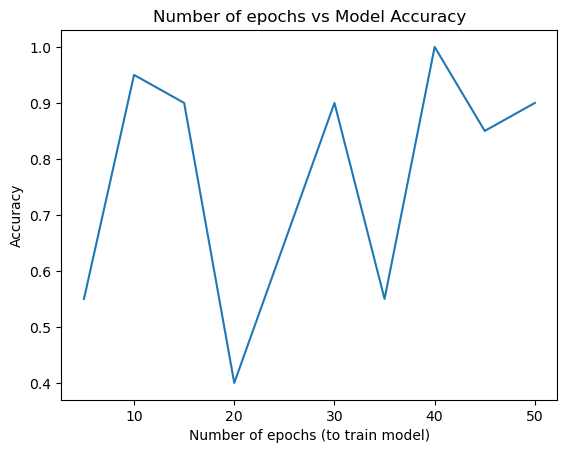

In [86]:
plt.plot(epoch_jumps, results)
plt.title("Number of epochs vs Model Accuracy")
plt.xlabel("Number of epochs (to train model)")
plt.ylabel("Accuracy")
plt.show()

In [89]:
# based on the results of the first test, the range can be contracted to [1, 10]
epoch_jumps = np.arange(11)
results = test_model_accuracy(target, epoch_jumps)

1/1 [==============================] - 0s 11ms/step
0.9
1/1 [==============================] - 0s 11ms/step
0.5
1/1 [==============================] - 0s 11ms/step
0.5
1/1 [==============================] - 0s 11ms/step
0.75
1/1 [==============================] - 0s 12ms/step
0.95
1/1 [==============================] - 0s 11ms/step
0.9
1/1 [==============================] - 0s 11ms/step
0.45
1/1 [==============================] - 0s 11ms/step
1.0
1/1 [==============================] - 0s 12ms/step
0.45
1/1 [==============================] - 0s 12ms/step
0.65
1/1 [==============================] - 0s 11ms/step
0.9


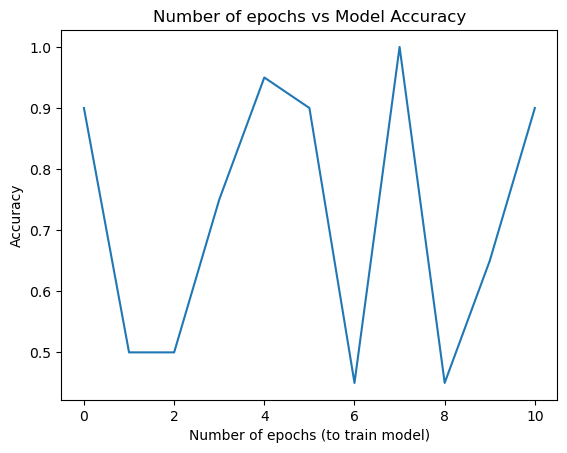

In [90]:
plt.plot(epoch_jumps, results)
plt.title("Number of epochs vs Model Accuracy")
plt.xlabel("Number of epochs (to train model)")
plt.ylabel("Accuracy")
plt.show()

In [95]:
# Based on the last graph, the lowest amount of epochs with 100% accuracy is chosen
# 7 was the chosen number of epochs
# The model was retrained with 7 epochs until the same accuracy (100%) was achieved
res = 0
while res < 1:
    res = test_model_accuracy(target, [7])[0]

1/1 [==============================] - 0s 12ms/step
0.7
1/1 [==============================] - 0s 11ms/step
0.8
1/1 [==============================] - 0s 11ms/step
0.6
1/1 [==============================] - 0s 12ms/step
0.95
1/1 [==============================] - 0s 12ms/step
0.4
1/1 [==============================] - 0s 12ms/step
1.0


In [96]:
# saving the model for later use in frontend with tensorflowjs
model.save("logic_model.h5")

In [97]:
# Create folder for files
!mkdir model

In [100]:
# Export to output folder
!tensorflowjs_converter --input_format keras logic_model.h5 model
# Check if export completed successfully
!ls -l ./model

2022-11-05 00:30:54.928394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 00:30:55.032103: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-05 00:30:55.032118: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-05 00:30:55.048579: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-05 00:30:55.417605: W tensorflow/stream_executor/platform/de